# IHM TP 6 - Expérience Contrôlée

## Étudiants
* *Thomas BOFFY* (p1606662)
* *William CHAZOT* (p1603066)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import violinplot, boxplot, displot
from scipy.stats import ttest_ind, shapiro
from statsmodels.stats.anova import AnovaRM

## 1. Chargement des données

In [28]:
data = pd.read_csv("./data.csv", sep=",", header=1)

data.rename(columns={data.columns[7]: "Condition", data.columns[0]: "Id"}, inplace = True)
data.head()

Id  experimenter  Expérience (1 peu d'expérience / 5 expert)     Téléphone  \
0   1  Thomas BOFFY                                         3.0  Galaxy S10 E   
1   1  Thomas BOFFY                                         3.0  Galaxy S10 E   
2   1  Thomas BOFFY                                         3.0  Galaxy S10 E   
3   1  Thomas BOFFY                                         3.0  Galaxy S10 E   
4   1  Thomas BOFFY                                         3.0  Galaxy S10 E   

        OS  trial  block   Condition   WPM  Erreurs  Correct words  \
0  Android      1    1.0     Gesture  30.0      7.0           32.0   
1  Android      2    2.0  Predictive  24.0      4.0           25.0   
2  Android      3    3.0      Simple  62.0      1.0           56.0   
3  Android      4    4.0     Gesture  27.0      2.0           27.0   
4  Android      5    5.0  Predictive  33.0      4.0           26.0   

   Keystrokes                remarques Clavier préféré  
0       164.0  surpris de l'exactitude          Simple  
1       140.0                      NaN          Simple  
2       312.0                      NaN          Simple  
3       143.0  surpris de l'exactitude          Simple  
4       200.0                      NaN          Simple

In [29]:
participants = [12, 23 , 8, 19, 7, 20, 2, 15, 26, 5, 11, 18, 17, 1, 4, 3, 24]

In [30]:
filtered_data = data[data["Id"].isin(participants)].loc[:, ["Id", "Condition", "WPM"]]
filtered_data["WPM"] = pd.to_numeric(filtered_data["WPM"], downcast="integer")
filtered_data.head()

Id   Condition  WPM
0   1     Gesture   30
1   1  Predictive   24
2   1      Simple   62
3   1     Gesture   27
4   1  Predictive   33

Après avoir récupéré les données qui nous intéressaient (identifiant, type de clavier et wpm), nous allons maintenant pouvoir réaliser différents tests et visualisations sur celles-ci.

## 2. Violin plot

Text(0.5, 0, 'Types de clavier')

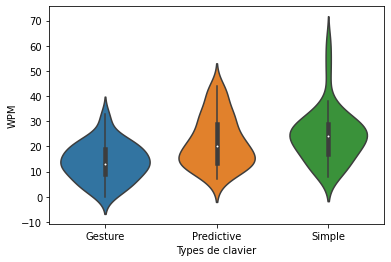

In [43]:
_, ax = plt.subplots()

violinplot(data=filtered_data, x="Condition", y="WPM")

ax.set_xlabel("Types de clavier")

Afin de pouvoir comparer les valeurs de WPM avec différentes populations, ici les 3 types de clavier, nous avons réalisé un Violin Plot. Ce dernier à l'avantage d'exposer la densité de probabilité des données, c'est-à-dire leur répartition, ce qui est plus expressif qu'un diagramme à moustaches classique.

Ainsi, on remarque assez facilement que les participants ont bien plus l'habitude d'utiliser un clavier *simple*. En effet, si on regarde la répartition pour chaque clavier, on remarque que la médiane (WPM médian) du clavier simple est plus élevée que les deux autres, et que ces deux types de clavier (*geste* et *prédictif*) ont une densité moins élevée à cette valeur de médiane. Cependant, la répartition du clavier prédictif s'estompe moins vite comparé au clavier de type geste, indiquant que la prédiction accompagne le clavier simple.

## 3. Vérification de la validité des donnés

### Distribution des essais par participant

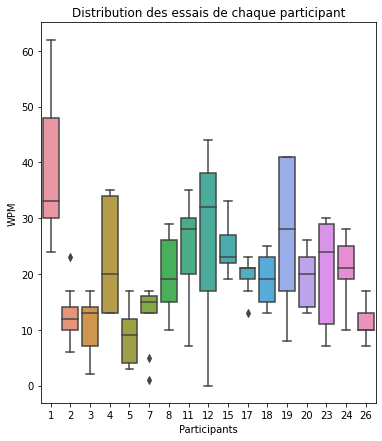

In [40]:
_, ax = plt.subplots(figsize=(6, 7))

boxplot(data=filtered_data, x="Id", y="WPM")

ax.set_xlabel("Participants")
ax.set_title("Distribution des essais de chaque participant")
plt.show()

Afin d'obtenir plus d'informations quant aux participants, nous avons analysé les essais de chacun sous la forme d'un diagramme à moustaches.

On remarque une diversité chez les participants : pour certains, l'utilisation d'un type de clavier spécifique ne change rien (leur premier et troisième quartiles sont très proches : ex. 2, 7, 17, 26), tandis que d'autres vont avoir une plus grande variance, c'est-à-dire qu'au moins un de ces types de clavier leur permet d'être plus performant.

### Distribution par type de clavier

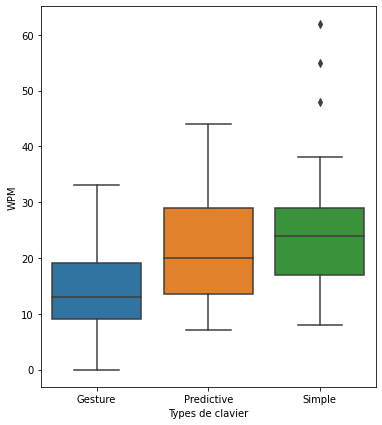

In [33]:
_, ax = plt.subplots(figsize=(6, 7))

boxplot(data=filtered_data, x="Condition", y="WPM")
ax.set_xlabel("Types de clavier")
plt.show()

Le Violin Plot (proposé précedemment) explicite déjà la plupart des informations quant à la comparaison des valeurs de WPM par type de clavier. On ne peut donc qu'affirmer que le clavier simple est le plus usité.

### Distribution par WPM

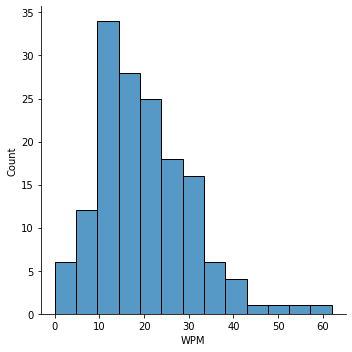

In [34]:
displot(data=filtered_data, x="WPM")
plt.show()

Nous avons réalise un histogramme afin de déceler la répartition des WPM par nombre de participants, tous types de clavier confondus.

On remarque que la majorité des participants se situent entre 10 et 30 WPM.

### Distribution de WPM par type de clavier

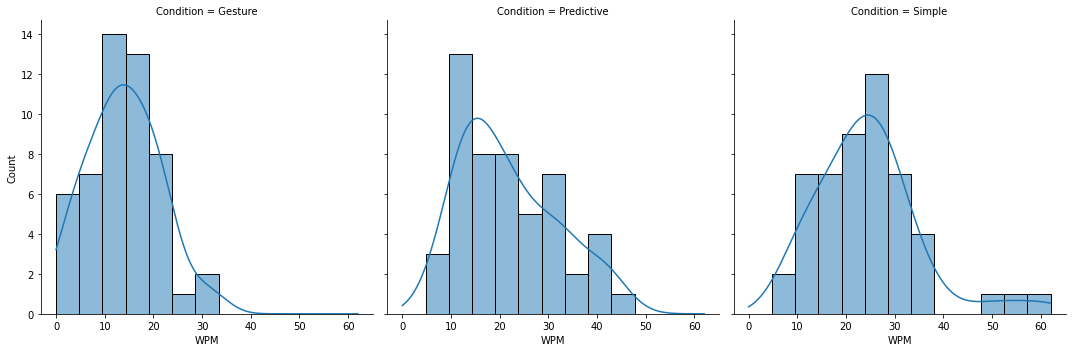

In [35]:
displot(data=filtered_data, x="WPM", col="Condition", kde=True)
plt.show()

Une analyse globale de la répartition n'étant pas très claire, nous allons la diviser et l'observer par type de clavier.

On remarque des similarités avec le Violin Plot, les différentes repartitions étant les mêmes.

### Test de la normalité des données (Shapiro)

In [50]:
shapiro(filtered_data[filtered_data["Condition"] == "Simple"]["WPM"]).pvalue

0.0006868690252304077

Avec le test de Shapiro, on remarque que les données ne sont clairement pas normalisées (la pvalue très inférieure à 0.05).

## 4. T-test entre un clavier simple et le clavier avancé

In [58]:
ttest_ind(
    filtered_data[filtered_data["Condition"] == "Simple"]["WPM"],
    filtered_data[filtered_data["Condition"] == "Predictive"]["WPM"],
    equal_var=False
)

Ttest_indResult(statistic=1.285186205878742, pvalue=0.20171250038832775)

In [69]:
ttest_ind(
    filtered_data[filtered_data["Condition"] == "Simple"]["WPM"],
    filtered_data[filtered_data["Condition"] == "Gesture"]["WPM"],
    equal_var=False
)

Ttest_indResult(statistic=5.751231869568183, pvalue=1.2210781785857295e-07)

Après avoir effectué deux T-tests entre les groupes de claviers *simple-prédictif* et *simple-geste*, nous obtenons différentes valeurs.

On peut dire avec confiance que le clavier simple est bien meilleur que le clavier de type geste (*statistic* plutôt élevée, et *pvalue* extrêmement faible, très inférieure à 0.05).  
En revanche, l'écart est bien moins grand entre les claviers prédictif et simple, mais on ne peut exclure l'hypothèse selon laquelle le clavier prédictif serait meilleur que le simple sur un échantillon de participants plus important (la *pvalue* étant bien supérieure à 0.05).

## 5. Anova

In [70]:
AnovaRM(
    data=filtered_data,
    depvar="WPM",
    subject="Id",
    within=["Condition"],
    aggregate_func="mean"
).fit().anova_table

F Value  Num DF  Den DF    Pr > F
Condition  12.504136     2.0    32.0  0.000097

Contrairement au T-test, l'analyse de la variance permet de généraliser le processus, c'est-à-dire d'effectuer la comparaison entre tous les groupes existants (ici tous les types de clavier).

On peut donc dire avec confiance (*pvalue* très inférieure à 0.05) qu'au moins 1 type de clavier parmi les 3 est significativement différent des deux autres. 

## 6. Conclusion

D'après les multiples graphiques présentés dans ce TP, on peut en déduire que le clavier différent est celui de type geste, qui est clairement moins bon que les deux autres.